In [1]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


In [2]:
data = pd.read_csv("/content/dataPreprocessed.csv")
data.shape
data.drop_duplicates(inplace=True)

print("No of Unique Job Descriptions: ", data['Job_Description'].count())
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:", stopword)


No of Unique Job Descriptions:  5492


[nltk_data] Downloading package stopwords to /root/nltk_data...


Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
class_df = data.groupby('label').count()
class_df.style.background_gradient(cmap='PiYG')


,X,Title,Company,Location,Type,Salary,Contract_type,Job_Description,JobType,Industry,experience,exp_normailzed,type_norm,Contract_type_norm,salary1,salary_min,salary_max,salary_avg,salary_norm,annual_pay
label,,,,,,,,,,,,,,,,,,,,
High,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,946,946,1478,1478,1478,1478,1478,1478,1478,1478
Low,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,802,802,1652,1652,1652,1652,1652,1652,1652,1652
Medium,2362,2362,2348,2362,2362,2362,2362,2362,2361,2361,1528,1528,2362,2362,2362,2362,2362,2362,2362,2362


In [4]:
def clean(job):
    job = job.lower()  # lower case
    job = re.sub(r'https?://\S+|www\.\S+', " ", job)  # URL
    # job = re.sub(r'@\w+', ' ', job)  # mentions
    # job = re.sub(r'#\w+', ' ', job)  # hashtags
    job = re.sub(r'[^\w\s]', ' ', job)  # punctuations
    # job = re.sub(r'\d+', ' ', job)  # digits
    job = re.sub('\[.*?\]', ' ', job)  # any punctuations left
    # any others charcters other than numbers and letters
    job = re.sub("[^a-z0-9]", " ", job)
    job = job.split()  # stopwords
    job = " ".join([word for word in job if not word in stopword])
    return job

In [5]:
data.head

<bound method NDFrame.head of          X                                              Title  \
0        1                        Construction Superintendent   
1        2                      Regional Construction Manager   
2        3                       Construction Project Manager   
3        5                               Construction Manager   
4        7            Project Manager - Construction (Hawaii)   
...    ...                                                ...   
5487  1206                                       TRAVEL AGENT   
5488  1207  LOTTERY-Accounts Payable Travel Specialist (Ac...   
5489  1208              Reservation Specialist/Beach Services   
5490  1213                                 Travel Coordinator   
5491  1215                             Reservation Specialist   

                                   Company              Location    Type  \
0        Curtis Construction Company, Inc.   Stoughton, MA 02072  Onsite   
1                   Chipotle Mexican 

In [6]:
data['Job_Description'] = data['Job_Description'].astype(
    str).apply(lambda x: clean(x))
data['Job_Description'].sample(5)

max_len = len(max(data['Job_Description'], key=len))
print("Maximum length of Job Decription:", max_len)

Maximum length of Job Decription: 24699


In [7]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()


def lemmatize_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + lemmatizer.lemmatize(w) + " "
    return temp


In [9]:
data['Job_Description'] = data['Job_Description'].apply(
    lambda x: lemmatize_jobs(x))

In [10]:
stemmer = PorterStemmer()

def stem_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + stemmer.stem(w) + " "
    return temp


data['Job_Description'] = data['Job_Description'].apply(lambda x: stem_jobs(x))

x = data['Job_Description']
y = data['label']

In [11]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
train_X, val_X, train_Y, val_Y = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)
train_X.shape

(4942,)

In [12]:
test_X.shape

(1099,)

In [13]:
val_X.shape

(550,)

In [14]:
# encoder = LabelEncoder()
# train_Y = encoder.fit_transform(train_Y)
# test_Y = encoder.fit_transform(test_Y)

LR TFIDF Validation Accuracy Score ->  88.0
LR TFIDF Test Accuracy Score ->  92.26569608735214
LR TFIDF Validation F1 Score ->  0.8762276675962798
LR TFIDF Test F1 Score ->  0.9204928286110116
              precision    recall  f1-score   support

        High       0.94      0.77      0.85       148
         Low       0.87      0.92      0.89       165
      Medium       0.86      0.92      0.89       237

    accuracy                           0.88       550
   macro avg       0.89      0.87      0.88       550
weighted avg       0.88      0.88      0.88       550

              precision    recall  f1-score   support

        High       0.97      0.85      0.91       296
         Low       0.89      0.95      0.92       330
      Medium       0.92      0.95      0.93       473

    accuracy                           0.92      1099
   macro avg       0.93      0.92      0.92      1099
weighted avg       0.92      0.92      0.92      1099



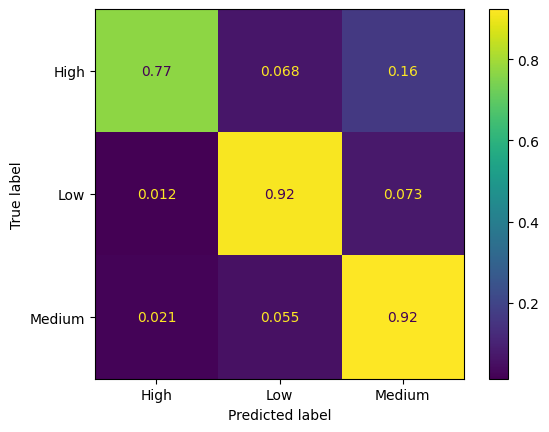

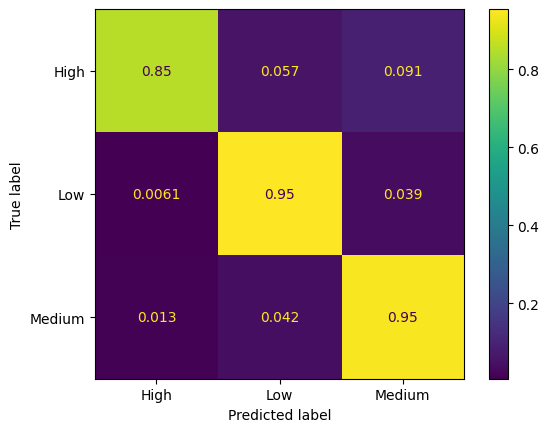

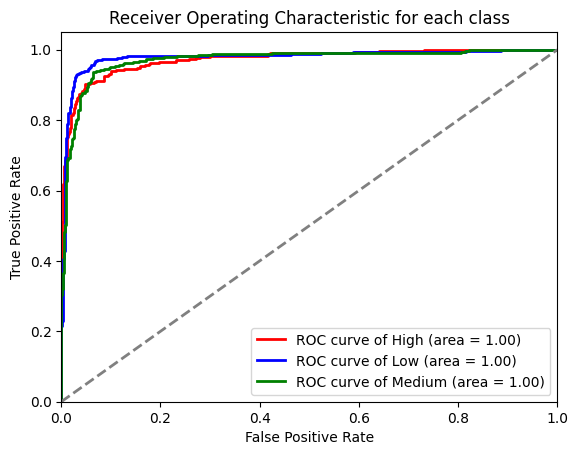

In [15]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

LR TFIDF Validation Accuracy Score ->  91.45454545454545
LR TFIDF Test Accuracy Score ->  95.72338489535942
LR TFIDF Validation F1 Score ->  0.9118015068859994
LR TFIDF Test F1 Score ->  0.9560904357828877
              precision    recall  f1-score   support

        High       0.94      0.85      0.89       148
         Low       0.91      0.93      0.92       165
      Medium       0.91      0.95      0.93       237

    accuracy                           0.91       550
   macro avg       0.92      0.91      0.91       550
weighted avg       0.92      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.97      0.93      0.95       296
         Low       0.95      0.96      0.96       330
      Medium       0.95      0.97      0.96       473

    accuracy                           0.96      1099
   macro avg       0.96      0.95      0.96      1099
weighted avg       0.96      0.96      0.96      1099



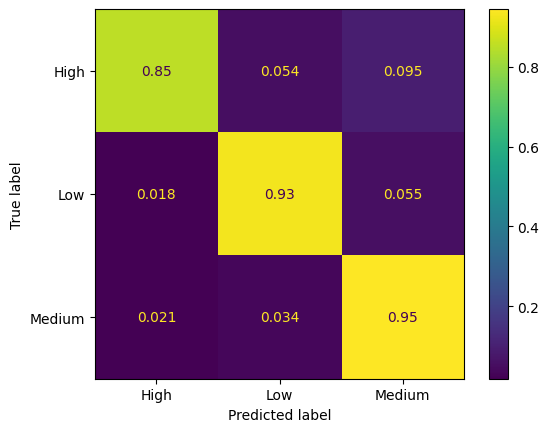

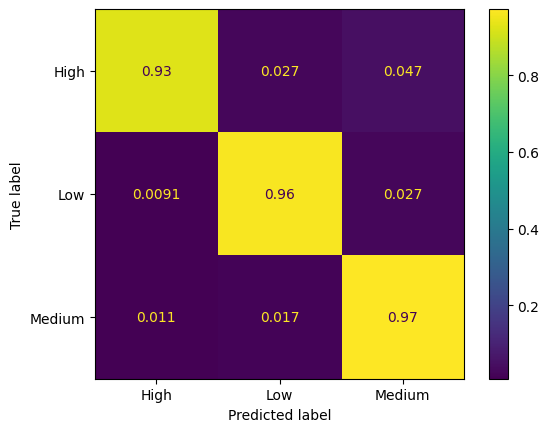

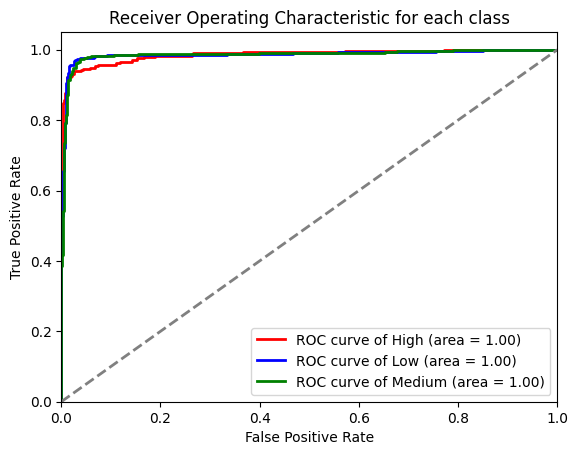

In [16]:
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

In [17]:
# vectorizer = TfidfVectorizer(ngram_range=(1, 3)).fit(train_X)
# train_X_tfidf = vectorizer.transform(train_X)
# test_X_tfidf = vectorizer.transform(test_X)
# lr = LogisticRegression(penalty="l2", multi_class="multinomial", solver="saga", C=1)
# lr.fit(train_X_tfidf, train_Y)
# lr_pred = lr.predict(test_X_tfidf)
# print("LR TFIDF Accuracy Score -> ", accuracy_score(lr_pred, test_Y)*100)

LR TFIDF Validation Accuracy Score ->  87.27272727272727
LR TFIDF Test Accuracy Score ->  92.72065514103731
LR TFIDF Validation F1 Score ->  0.8675134462900913
LR TFIDF Test F1 Score ->  0.9243267392084079
              precision    recall  f1-score   support

        High       0.95      0.74      0.83       148
         Low       0.86      0.90      0.88       165
      Medium       0.85      0.93      0.89       237

    accuracy                           0.87       550
   macro avg       0.89      0.86      0.87       550
weighted avg       0.88      0.87      0.87       550

              precision    recall  f1-score   support

        High       0.97      0.85      0.91       296
         Low       0.91      0.95      0.93       330
      Medium       0.91      0.96      0.94       473

    accuracy                           0.93      1099
   macro avg       0.93      0.92      0.92      1099
weighted avg       0.93      0.93      0.93      1099



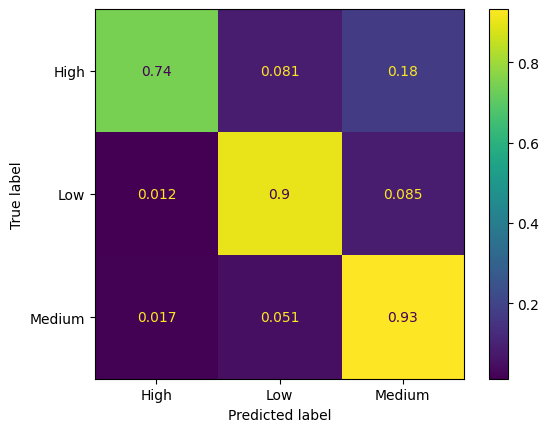

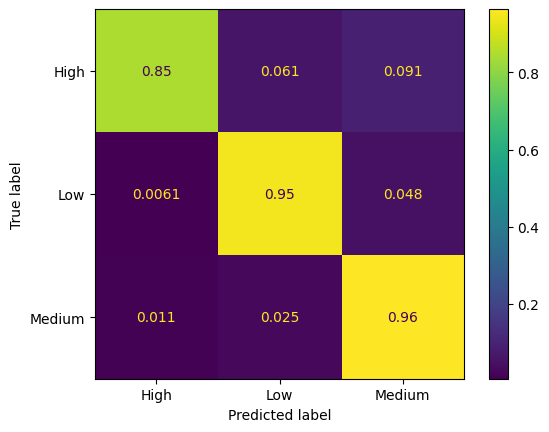

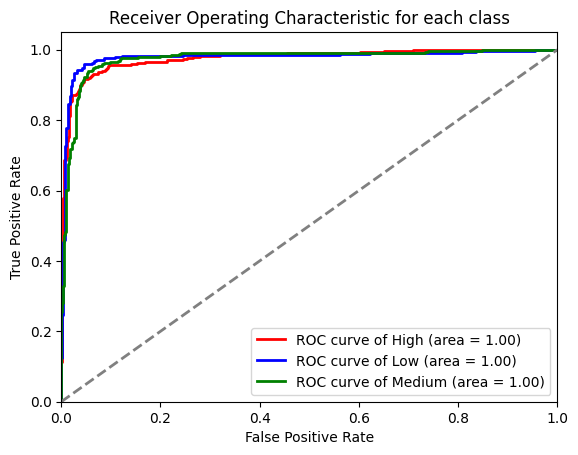

In [18]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=1, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

LR TFIDF Validation Accuracy Score ->  91.27272727272727
LR TFIDF Test Accuracy Score ->  95.72338489535942
LR TFIDF Validation F1 Score ->  0.9095774619447101
LR TFIDF Test F1 Score ->  0.9560725736196446
              precision    recall  f1-score   support

        High       0.94      0.84      0.89       148
         Low       0.90      0.93      0.91       165
      Medium       0.91      0.95      0.93       237

    accuracy                           0.91       550
   macro avg       0.92      0.91      0.91       550
weighted avg       0.91      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.97      0.92      0.95       296
         Low       0.95      0.97      0.96       330
      Medium       0.95      0.97      0.96       473

    accuracy                           0.96      1099
   macro avg       0.96      0.95      0.96      1099
weighted avg       0.96      0.96      0.96      1099



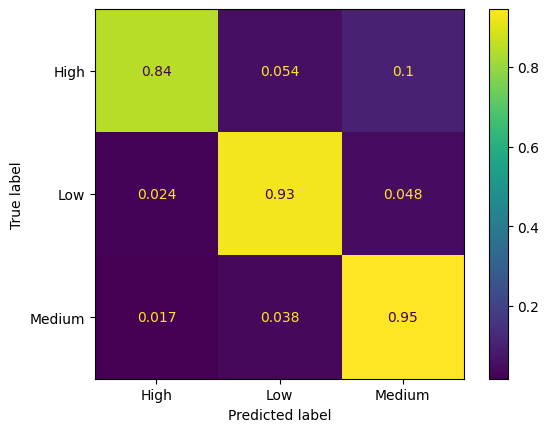

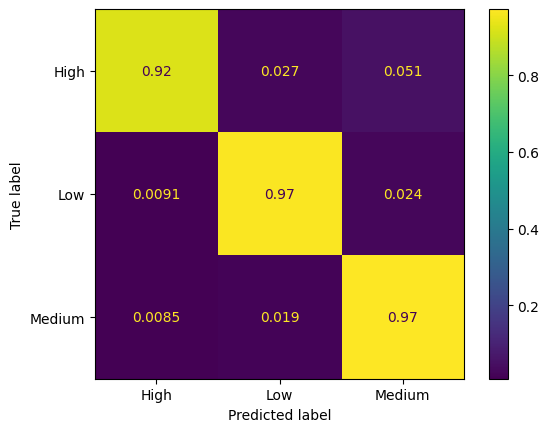

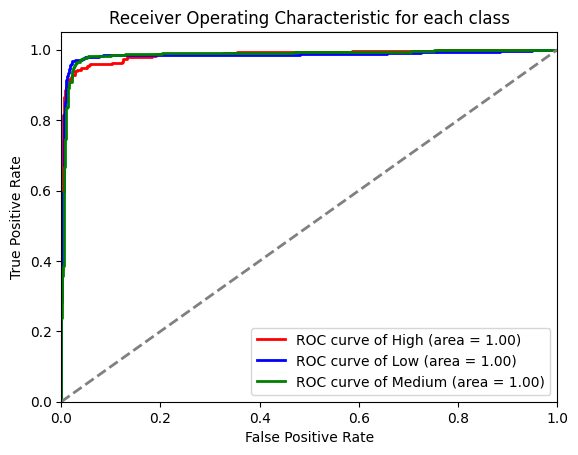

In [19]:
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

lr1 = LogisticRegression(penalty="l2",multi_class = "multinomial",solver = "saga", C=10, max_iter=5000)
lr1.fit(train_X_tfidf,train_Y)

lrv1_pred = lr1.predict(val_X_tfidf)
lrt1_pred = lr1.predict(test_X_tfidf)

print("LR TFIDF Validation Accuracy Score -> ",accuracy_score(lrv1_pred, val_Y)*100)
print("LR TFIDF Test Accuracy Score -> ",accuracy_score(lrt1_pred, test_Y)*100)

lrv_cm = confusion_matrix(val_Y, lrv1_pred, normalize="true")
lrt_cm = confusion_matrix(test_Y, lrt1_pred, normalize="true")
# sns.heatmap(lr_cm, annot=True)

print("LR TFIDF Validation F1 Score -> ", f1_score(val_Y, lrv1_pred, average='macro'))
print("LR TFIDF Test F1 Score -> ", f1_score(test_Y, lrt1_pred, average='macro'))

print(classification_report(val_Y, lrv1_pred))
print(classification_report(test_Y, lrt1_pred))


dispv = ConfusionMatrixDisplay(confusion_matrix=lrv_cm, display_labels=lr1.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=lrt_cm, display_labels=lr1.classes_)

dispv.plot()
dispt.plot()
plt.show()

y_score = lr1.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

SVM validation Accuracy Score ->  90.72727272727272
SVM test Accuracy Score ->  94.99545040946315


SVM validation F1 Score ->  0.904594647776466
SVM test F1 Score ->  0.9487333550517904
              precision    recall  f1-score   support

        High       0.94      0.84      0.89       148
         Low       0.89      0.93      0.91       165
      Medium       0.90      0.94      0.92       237

    accuracy                           0.91       550
   macro avg       0.91      0.90      0.90       550
weighted avg       0.91      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.97      0.91      0.94       296
         Low       0.94      0.96      0.95       330
      Medium       0.95      0.96      0.95       473

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



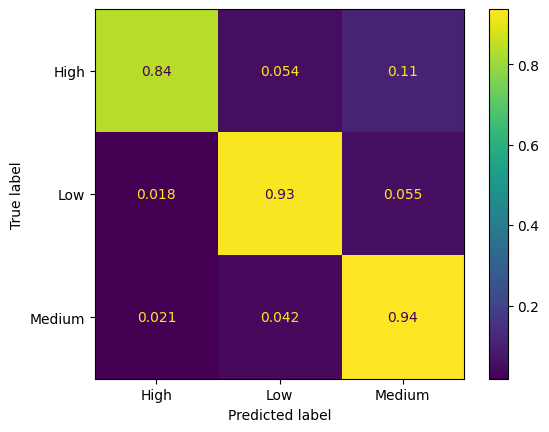

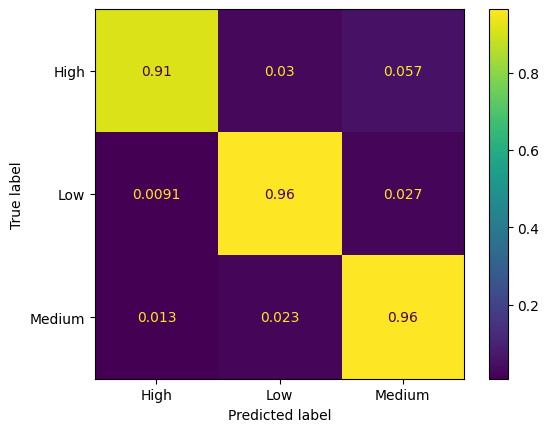

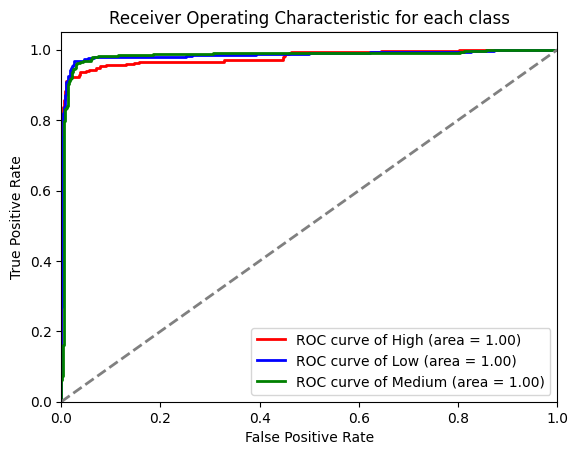

In [21]:
print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  91.45454545454545
SVM test Accuracy Score ->  95.72338489535942
SVM validation F1 Score ->  0.9120824268005667
SVM test F1 Score ->  0.9560261757048378
              precision    recall  f1-score   support

        High       0.94      0.85      0.89       148
         Low       0.91      0.93      0.92       165
      Medium       0.90      0.95      0.92       237

    accuracy                           0.91       550
   macro avg       0.92      0.91      0.91       550
weighted avg       0.92      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.97      0.93      0.95       296
         Low       0.95      0.96      0.96       330
      Medium       0.95      0.97      0.96       473

    accuracy                           0.96      1099
   macro avg       0.96      0.95      0.96      1099
weighted avg       0.96      0.96      0.96      1099



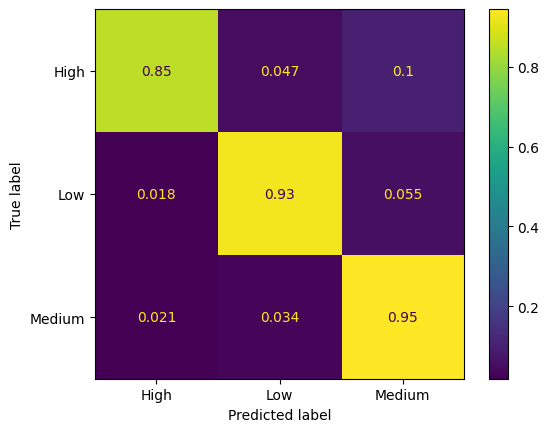

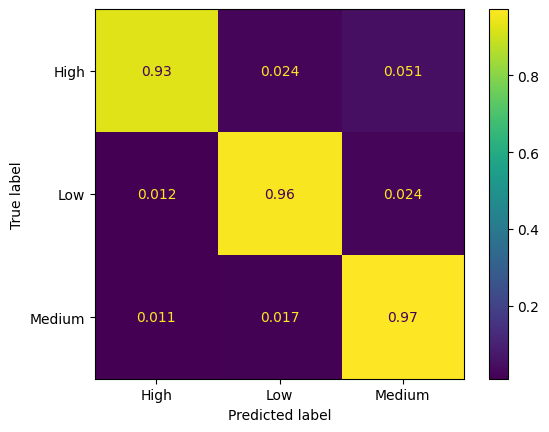

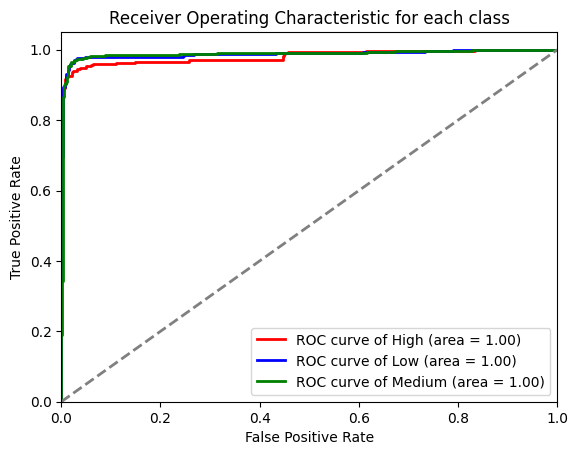

In [22]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  91.0909090909091
SVM test Accuracy Score ->  95.1774340309372
SVM validation F1 Score ->  0.9081177716959479
SVM test F1 Score ->  0.9507388727469864
              precision    recall  f1-score   support

        High       0.93      0.84      0.89       148
         Low       0.90      0.93      0.92       165
      Medium       0.91      0.94      0.92       237

    accuracy                           0.91       550
   macro avg       0.91      0.90      0.91       550
weighted avg       0.91      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.96      0.92      0.94       296
         Low       0.95      0.96      0.95       330
      Medium       0.95      0.96      0.96       473

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



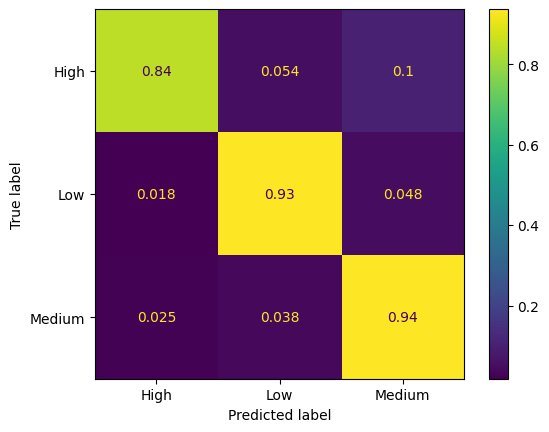

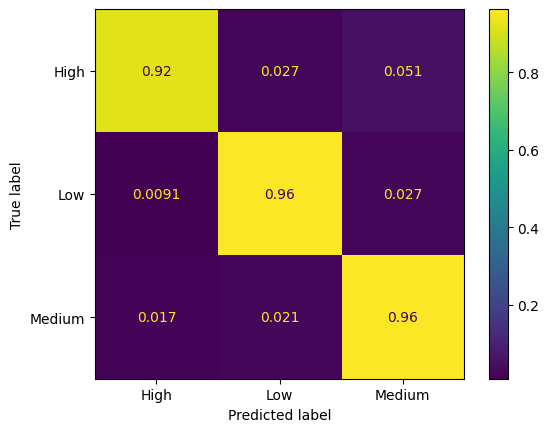

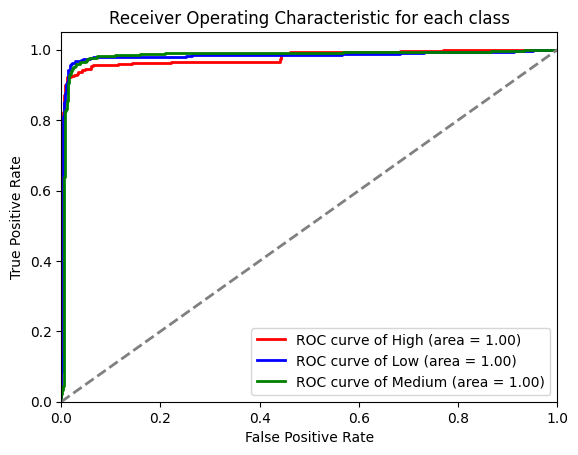

In [23]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  91.45454545454545
SVM test Accuracy Score ->  95.63239308462238
SVM validation F1 Score ->  0.9114536526197302
SVM test F1 Score ->  0.9550381803892205
              precision    recall  f1-score   support

        High       0.93      0.85      0.89       148
         Low       0.90      0.93      0.92       165
      Medium       0.91      0.94      0.93       237

    accuracy                           0.91       550
   macro avg       0.92      0.91      0.91       550
weighted avg       0.92      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.97      0.93      0.95       296
         Low       0.95      0.96      0.96       330
      Medium       0.95      0.97      0.96       473

    accuracy                           0.96      1099
   macro avg       0.96      0.95      0.96      1099
weighted avg       0.96      0.96      0.96      1099



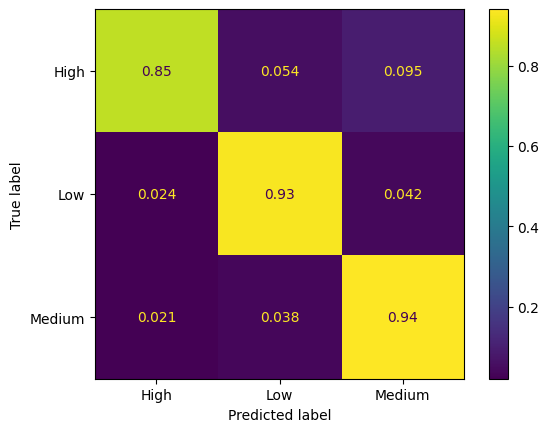

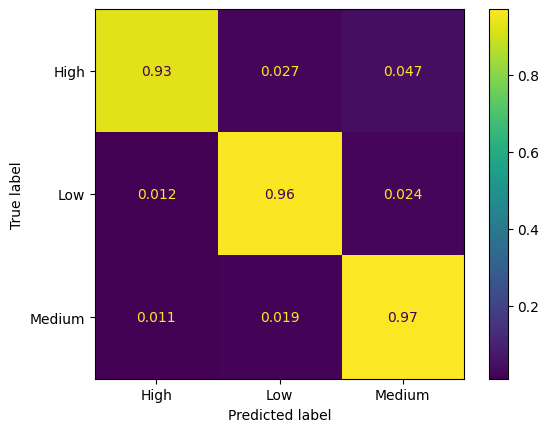

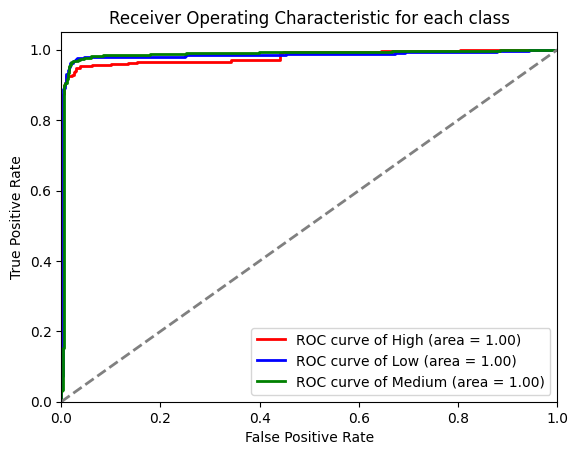

In [24]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='linear', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  90.54545454545455
SVM test Accuracy Score ->  95.1774340309372
SVM validation F1 Score ->  0.9021001557123697
SVM test F1 Score ->  0.9506982865793582
              precision    recall  f1-score   support

        High       0.95      0.82      0.88       148
         Low       0.88      0.93      0.90       165
      Medium       0.90      0.94      0.92       237

    accuracy                           0.91       550
   macro avg       0.91      0.90      0.90       550
weighted avg       0.91      0.91      0.90       550

              precision    recall  f1-score   support

        High       0.98      0.92      0.95       296
         Low       0.94      0.96      0.95       330
      Medium       0.94      0.97      0.96       473

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



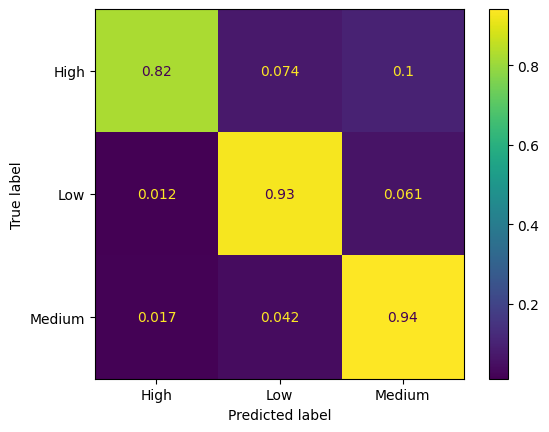

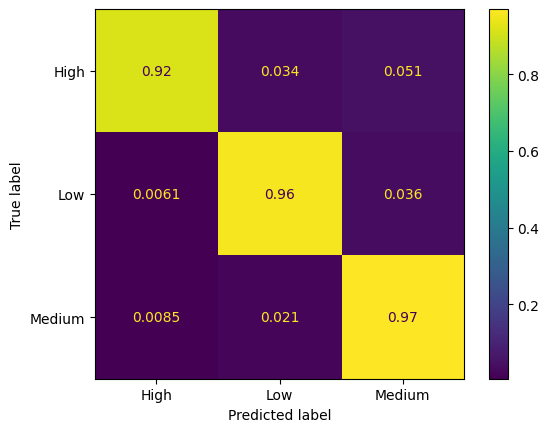

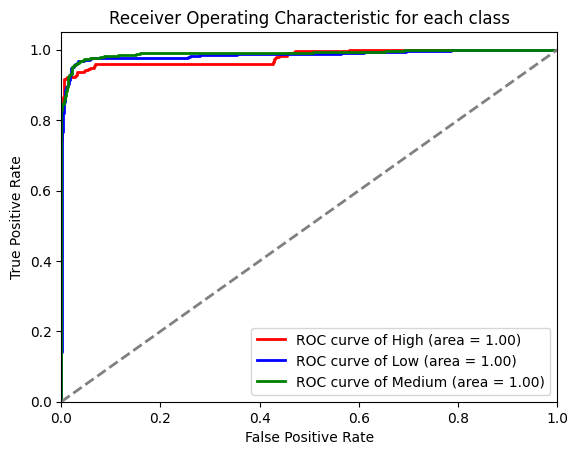

In [25]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  91.0909090909091
SVM test Accuracy Score ->  95.4504094631483
SVM validation F1 Score ->  0.9078967097860008
SVM test F1 Score ->  0.9534556735122579
              precision    recall  f1-score   support

        High       0.94      0.85      0.89       148
         Low       0.89      0.92      0.90       165
      Medium       0.91      0.94      0.93       237

    accuracy                           0.91       550
   macro avg       0.91      0.90      0.91       550
weighted avg       0.91      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.98      0.93      0.95       296
         Low       0.94      0.96      0.95       330
      Medium       0.95      0.97      0.96       473

    accuracy                           0.95      1099
   macro avg       0.96      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



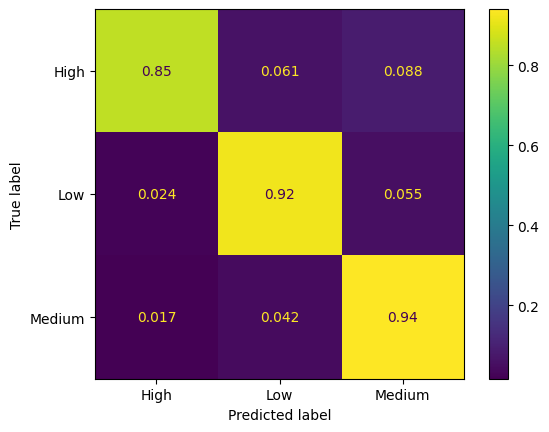

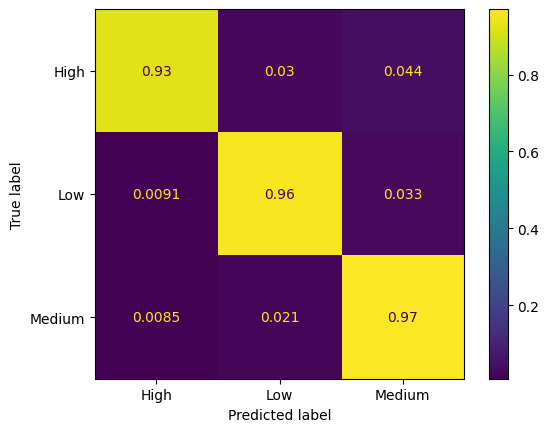

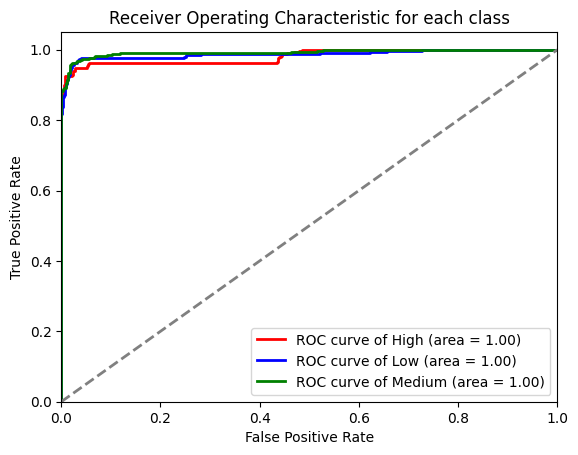

In [26]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()
y_score = svm.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  89.81818181818181
SVM test Accuracy Score ->  94.90445859872611
SVM validation F1 Score ->  0.8948946948825851
SVM test F1 Score ->  0.9478210961981324
              precision    recall  f1-score   support

        High       0.97      0.81      0.88       148
         Low       0.88      0.90      0.89       165
      Medium       0.88      0.95      0.91       237

    accuracy                           0.90       550
   macro avg       0.91      0.89      0.89       550
weighted avg       0.90      0.90      0.90       550

              precision    recall  f1-score   support

        High       0.99      0.91      0.94       296
         Low       0.94      0.95      0.94       330
      Medium       0.94      0.97      0.96       473

    accuracy                           0.95      1099
   macro avg       0.95      0.94      0.95      1099
weighted avg       0.95      0.95      0.95      1099



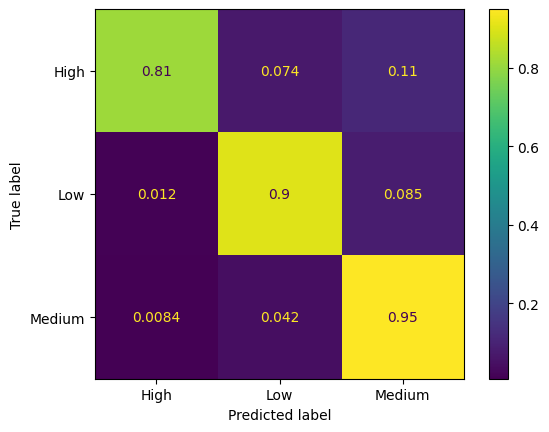

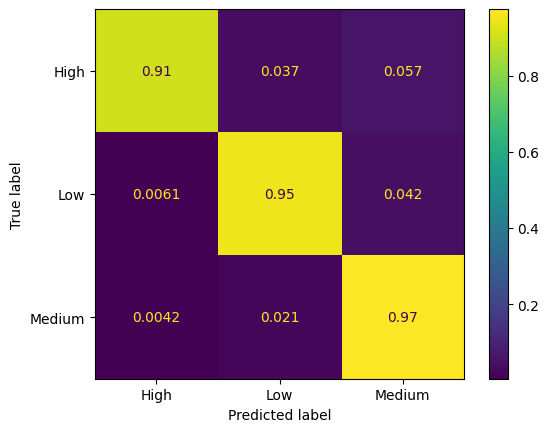

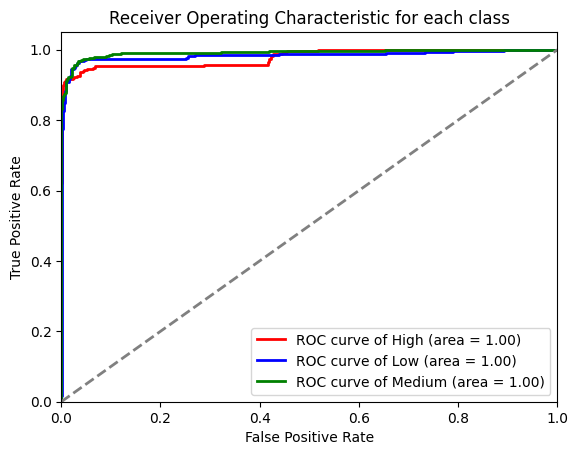

In [27]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  90.54545454545455
SVM test Accuracy Score ->  95.1774340309372
SVM validation F1 Score ->  0.9026922998177835
SVM test F1 Score ->  0.9507097565580817
              precision    recall  f1-score   support

        High       0.95      0.84      0.89       148
         Low       0.89      0.92      0.90       165
      Medium       0.90      0.94      0.92       237

    accuracy                           0.91       550
   macro avg       0.91      0.90      0.90       550
weighted avg       0.91      0.91      0.91       550

              precision    recall  f1-score   support

        High       0.97      0.92      0.95       296
         Low       0.94      0.95      0.95       330
      Medium       0.94      0.97      0.96       473

    accuracy                           0.95      1099
   macro avg       0.95      0.95      0.95      1099
weighted avg       0.95      0.95      0.95      1099



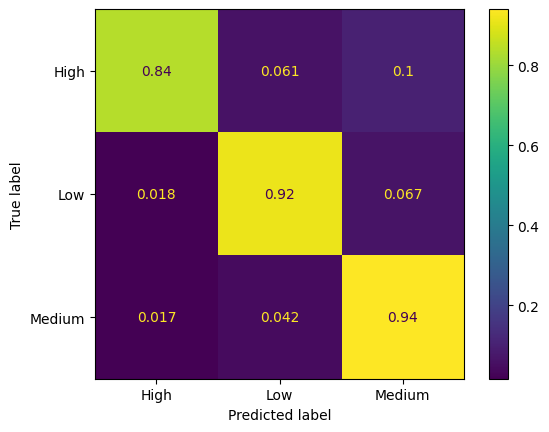

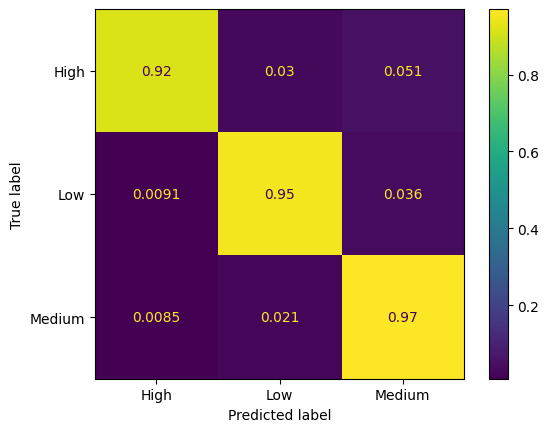

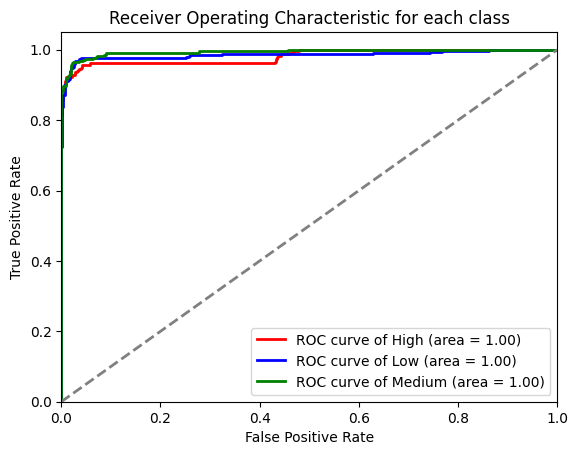

In [28]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)

classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  79.27272727272727
SVM test Accuracy Score ->  89.62693357597816
SVM validation F1 Score ->  0.7867195236851016
SVM test F1 Score ->  0.8972756547500845
              precision    recall  f1-score   support

        High       0.99      0.66      0.79       148
         Low       1.00      0.62      0.76       165
      Medium       0.68      1.00      0.81       237

    accuracy                           0.79       550
   macro avg       0.89      0.76      0.79       550
weighted avg       0.86      0.79      0.79       550

              precision    recall  f1-score   support

        High       1.00      0.83      0.90       296
         Low       1.00      0.81      0.89       330
      Medium       0.81      1.00      0.89       473

    accuracy                           0.90      1099
   macro avg       0.93      0.88      0.90      1099
weighted avg       0.92      0.90      0.90      1099



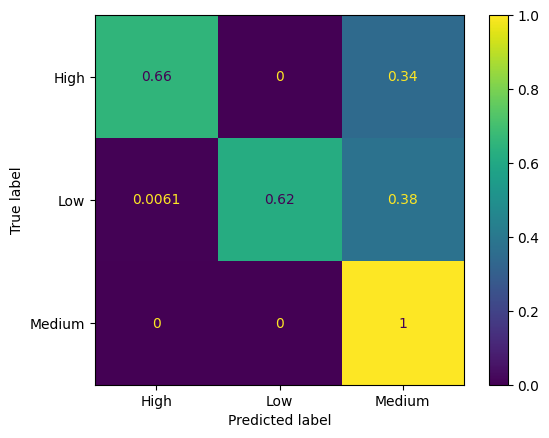

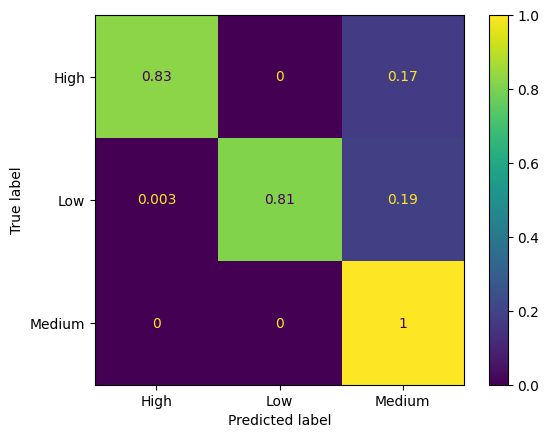

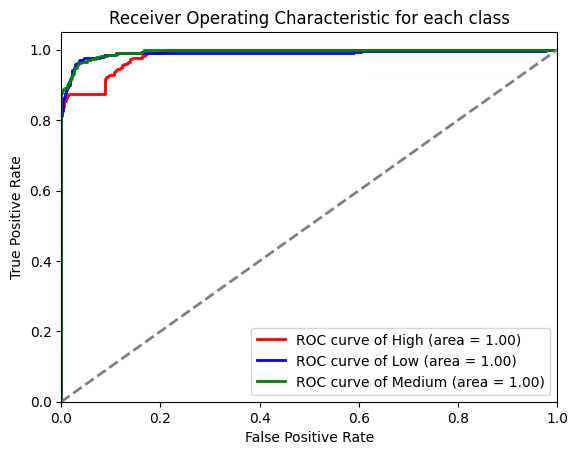

In [29]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  80.36363636363636
SVM test Accuracy Score ->  90.08189262966333
SVM validation F1 Score ->  0.798082925713803
SVM test F1 Score ->  0.9014380943593379
              precision    recall  f1-score   support

        High       0.97      0.68      0.80       148
         Low       0.99      0.64      0.78       165
      Medium       0.69      1.00      0.82       237

    accuracy                           0.80       550
   macro avg       0.89      0.77      0.80       550
weighted avg       0.86      0.80      0.80       550

              precision    recall  f1-score   support

        High       0.99      0.84      0.91       296
         Low       1.00      0.82      0.90       330
      Medium       0.82      1.00      0.90       473

    accuracy                           0.90      1099
   macro avg       0.93      0.88      0.90      1099
weighted avg       0.92      0.90      0.90      1099



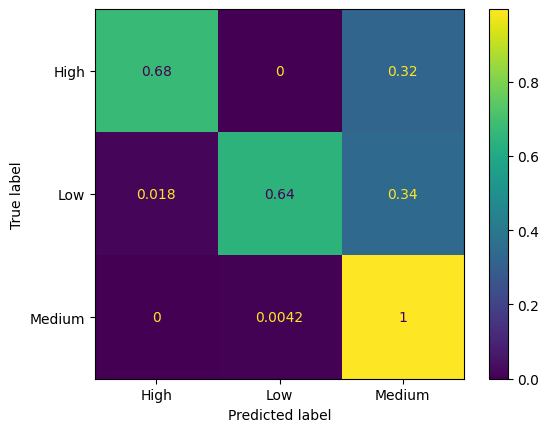

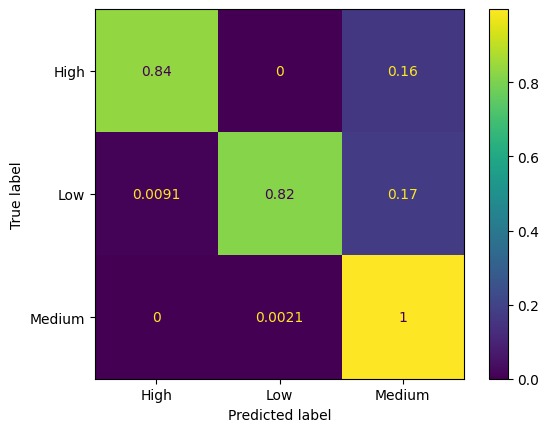

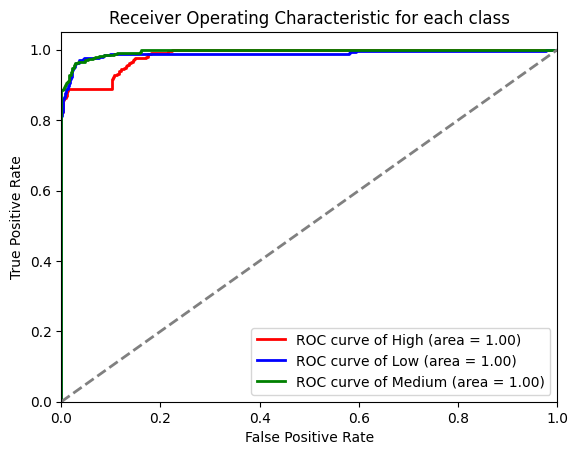

In [30]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,3)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  78.72727272727272
SVM test Accuracy Score ->  89.35395814376706
SVM validation F1 Score ->  0.7806692388957788
SVM test F1 Score ->  0.8945733525131861
              precision    recall  f1-score   support

        High       0.99      0.66      0.79       148
         Low       1.00      0.60      0.75       165
      Medium       0.67      1.00      0.80       237

    accuracy                           0.79       550
   macro avg       0.89      0.75      0.78       550
weighted avg       0.86      0.79      0.78       550

              precision    recall  f1-score   support

        High       1.00      0.83      0.90       296
         Low       1.00      0.80      0.89       330
      Medium       0.80      1.00      0.89       473

    accuracy                           0.89      1099
   macro avg       0.93      0.88      0.89      1099
weighted avg       0.91      0.89      0.89      1099



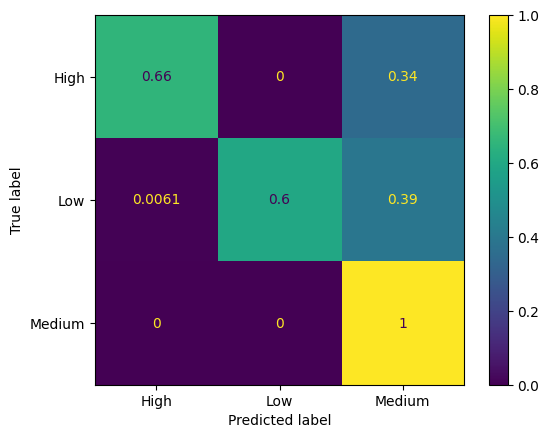

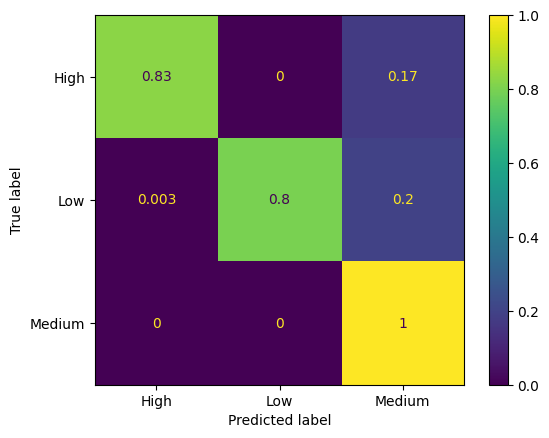

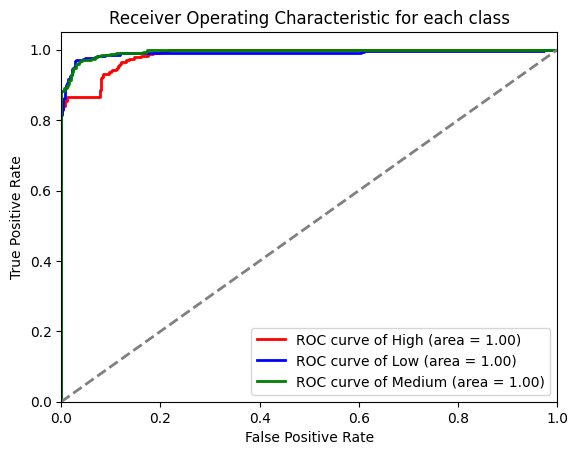

In [31]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=1, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()
y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

SVM validation Accuracy Score ->  79.45454545454545
SVM test Accuracy Score ->  89.7179253867152
SVM validation F1 Score ->  0.7877245219174993
SVM test F1 Score ->  0.8977846013481566
              precision    recall  f1-score   support

        High       0.97      0.68      0.80       148
         Low       1.00      0.61      0.75       165
      Medium       0.68      1.00      0.81       237

    accuracy                           0.79       550
   macro avg       0.88      0.76      0.79       550
weighted avg       0.86      0.79      0.79       550

              precision    recall  f1-score   support

        High       0.99      0.84      0.91       296
         Low       1.00      0.80      0.89       330
      Medium       0.81      1.00      0.90       473

    accuracy                           0.90      1099
   macro avg       0.93      0.88      0.90      1099
weighted avg       0.92      0.90      0.90      1099



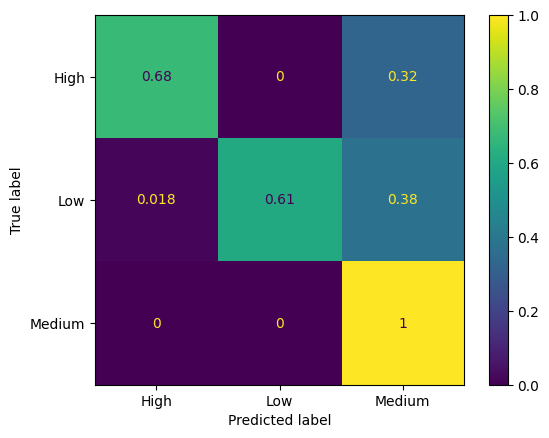

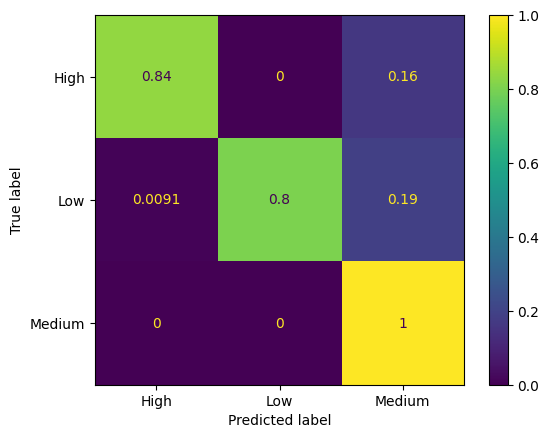

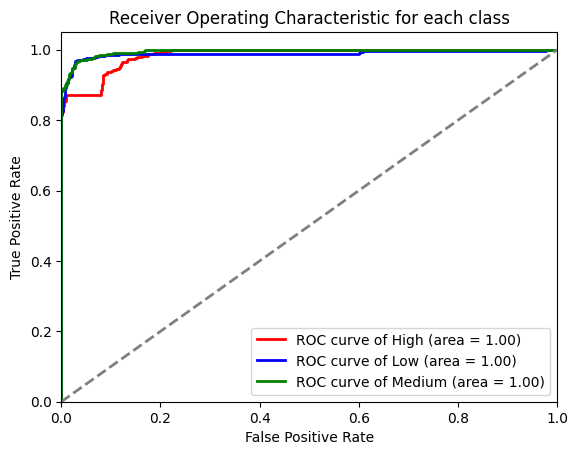

In [32]:
from sklearn.svm import SVC
vectorizer = CountVectorizer(ngram_range= (1,5)).fit(train_X)
train_X_cv = vectorizer.transform(train_X)
test_X_cv = vectorizer.transform(test_X)
val_X_cv = vectorizer.transform(val_X)

transformer = TfidfTransformer()
train_X_tfidf = transformer.fit_transform(train_X_cv)
test_X_tfidf = transformer.fit_transform(test_X_cv)
val_X_tfidf = transformer.fit_transform(val_X_cv)

svm = SVC(C=10, kernel='poly', degree=3, gamma='scale', decision_function_shape='ovr')

svm.fit(train_X_tfidf,train_Y)

svmt_pred = svm.predict(test_X_tfidf)
svmv_pred = svm.predict(val_X_tfidf)


print("SVM validation Accuracy Score -> ",accuracy_score(svmv_pred, val_Y)*100)
print("SVM test Accuracy Score -> ",accuracy_score(svmt_pred, test_Y)*100)

print("SVM validation F1 Score -> ", f1_score(val_Y, svmv_pred, average='macro'))
print("SVM test F1 Score -> ", f1_score(test_Y, svmt_pred, average='macro'))

print(classification_report(val_Y, svmv_pred))
print(classification_report(test_Y, svmt_pred))

svmv_cm = confusion_matrix(val_Y, svmv_pred, normalize="true")
svmt_cm = confusion_matrix(test_Y, svmt_pred, normalize="true")

dispv = ConfusionMatrixDisplay(confusion_matrix=svmv_cm, display_labels=svm.classes_)
dispt = ConfusionMatrixDisplay(confusion_matrix=svmt_cm, display_labels=svm.classes_)
dispv.plot()
dispt.plot()
plt.show()

y_score = svm.decision_function(test_X_tfidf)
classes1=['High', 'Low', 'Medium']
y_test_binarized = label_binarize(test_Y, classes=['High', 'Low', 'Medium'])
n_classes = y_test_binarized.shape[1] 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of {classes1[i]} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()